#Bar Graph

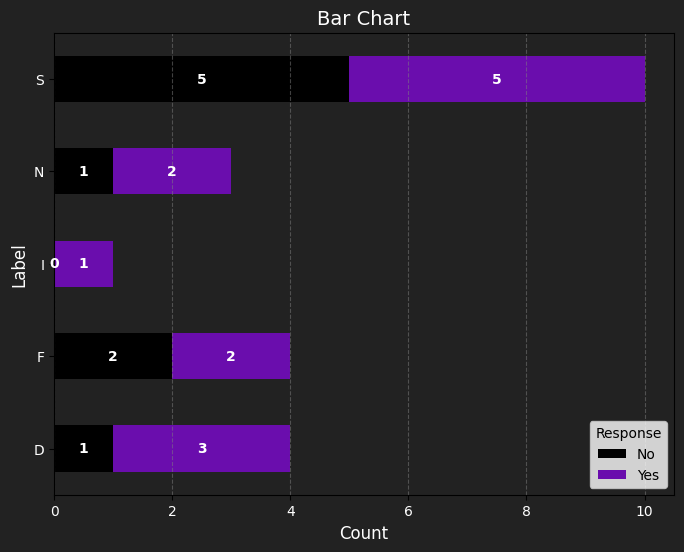

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

file_url = "https://raw.githubusercontent.com/Haratoooo/PLOTS/refs/heads/main/bar_assignment.csv"
df = pd.read_csv(file_url)

# Transform COUNT values (1 -> 'Yes', 0 -> 'No')
df['COUNT'] = df['COUNT'].map({1: 'Yes', 0: 'No'})

# Pivot data to get counts per LABEL category
transformed_data = df.groupby(['LABEL', 'COUNT']).size().unstack(fill_value=0)

# Define colors (Purple for "Yes", Black for "No")
colors = ['#000000', '#6a0dad']  # Black for "No", Purple for "Yes"

# Plot horizontal stacked bar chart
ax = transformed_data.plot(kind='barh', stacked=True, color=colors, figsize=(8, 6))

# Add data labels inside the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', color='white', fontsize=10, weight='bold')

# Customize the chart
plt.xlabel("Count", fontsize=12, color='white')
plt.ylabel("Label", fontsize=12, color='white')
plt.title("Bar Chart", fontsize=14, color='white')
plt.legend(title="Response", labels=["No", "Yes"], fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5, color='gray')

# Dark mode background
ax.set_facecolor('#222222')  # Dark gray background
plt.gcf().set_facecolor('#222222')  # Background for the entire figure
plt.xticks(color='white')
plt.yticks(color='white')

# Show the chart directly in Colab
plt.show()


#Sankey Graph

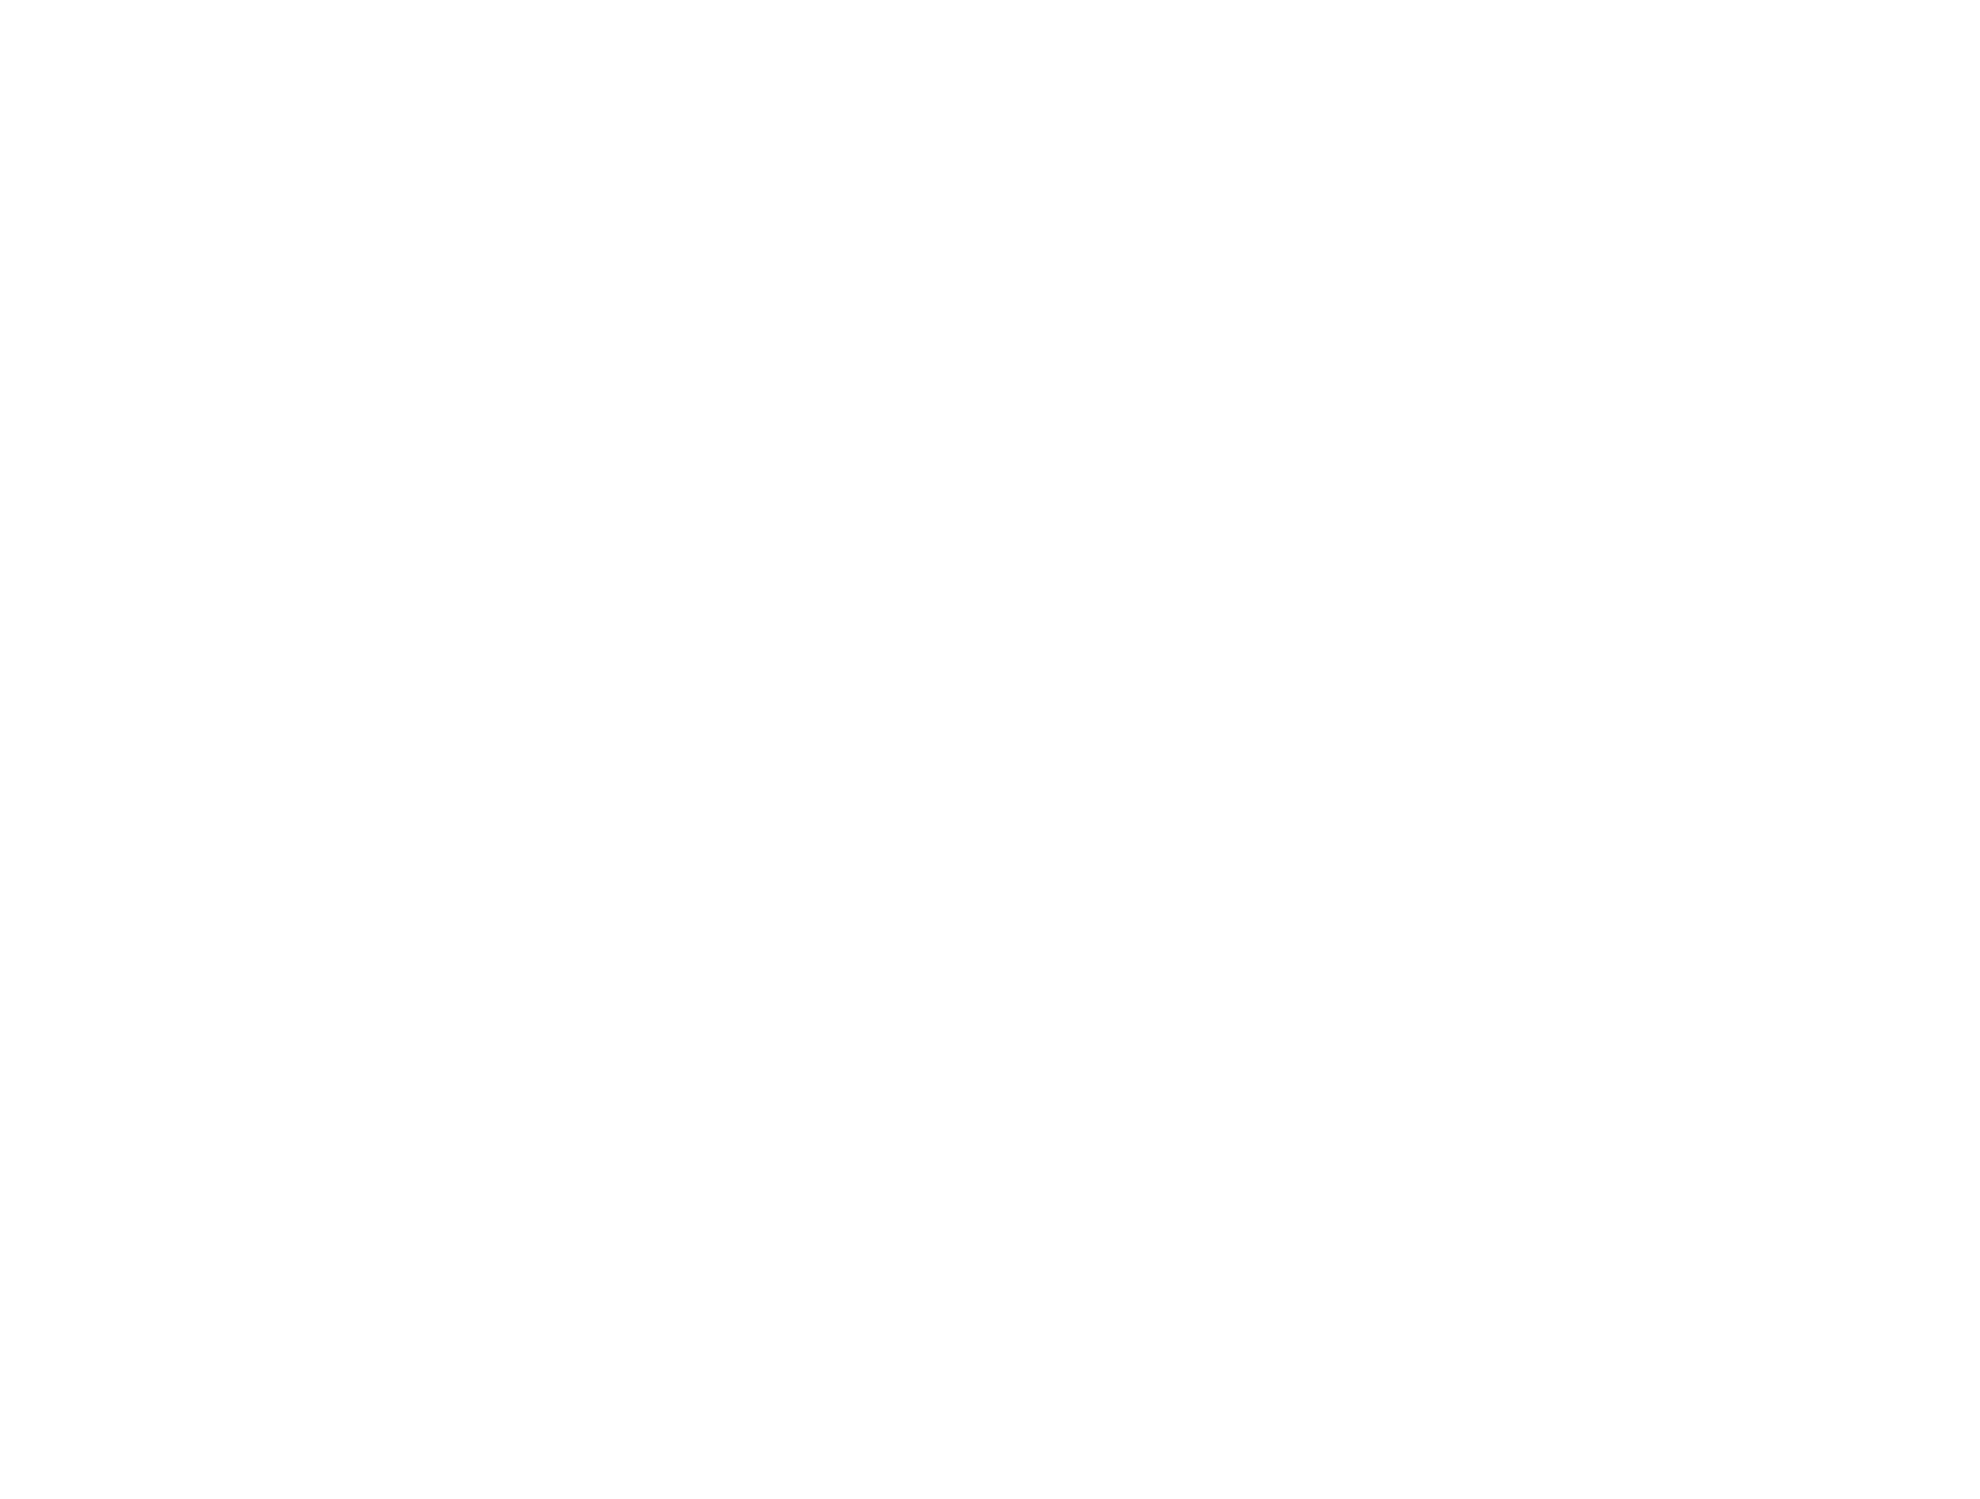

<Figure size 640x480 with 0 Axes>

In [28]:
import pandas as pd
import plotly.graph_objects as go
from IPython.display import Image

# Dataset
file_url = "https://raw.githubusercontent.com/Haratoooo/PLOTS/main/sankey_assignment.csv"
df = pd.read_csv(file_url)

sources = df.columns[1:9].tolist()
middle = df["LABEL"].unique().tolist()
targets = df.columns[9:].tolist()

# label list
labels = sources + middle + targets

source_to_middle_links = []
middle_to_target_links = []

for _, row in df.iterrows():
    middle_node = row["LABEL"]

    for source in sources:
        value = row[source]
        if value > 0:
            source_to_middle_links.append((source, middle_node, value))

    for target in targets:
        value = row[target]
        if value > 0:
            middle_to_target_links.append((middle_node, target, value))

all_links = source_to_middle_links + middle_to_target_links

sources_indices = [labels.index(source) for source, target, _ in all_links]
targets_indices = [labels.index(target) for source, target, _ in all_links]
values = [value for _, _, value in all_links]

node_colors = ['#6a0dad' if label in sources else '#808080' if label in middle else '#000000' for label in labels]
link_colors = ['rgba(106,13,173,0.5)' for _ in range(len(sources_indices))]

# Diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=sources_indices,
        target=targets_indices,
        value=values,
        color=link_colors
    )
))


fig.update_layout(
    title_text="Sankey Diagram",
    font=dict(size=14, color='white'),
    paper_bgcolor='black'
)

# Show
# fig.show()

plt.savefig("sankey_diagram.png", dpi=300, bbox_inches='tight')
# files.download("sankey_diagram.png")

Image("sankey_diagram.png")


Network Graph

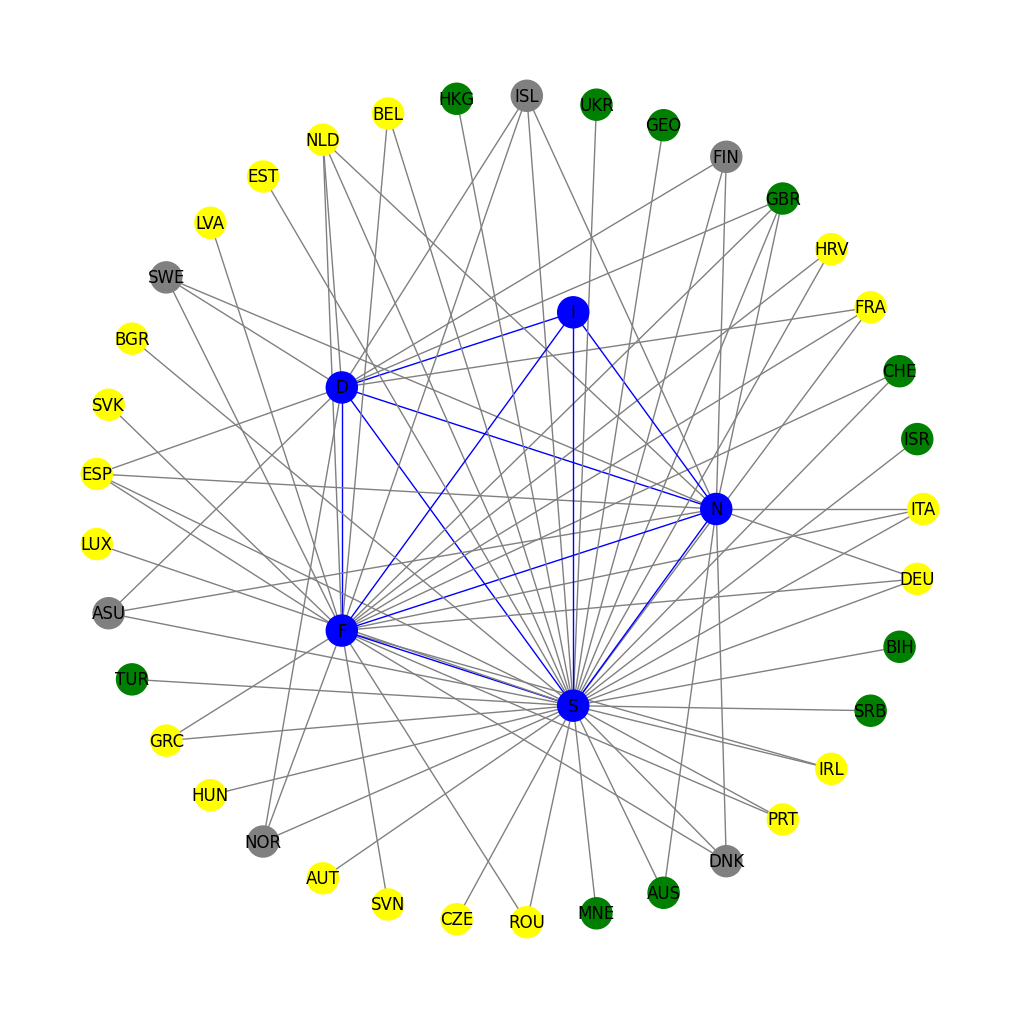

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Define node groups
blue_nodes = {'D', 'F', 'I', 'N', 'S'}
green_nodes = {'BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA'}
yellow_nodes = {'AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP'}


# Load dataset
# Load CSV from GitHub
file_url = "https://raw.githubusercontent.com/Haratoooo/PLOTS/refs/heads/main/networks_assignment.to_csv"
df = pd.read_csv(file_url)


# Create graph
G = nx.Graph()
edge_color_map = {}

# Add edges based on adjacency matrix
for i, row in df.iterrows():
    node = row['LABELS']
    for j, col in enumerate(df.columns[1:]):  # Skip the LABELS column
        weight = row[col]
        if weight > 0:
            G.add_edge(node, col, weight=weight)
            if node in blue_nodes and col in blue_nodes:
                edge_color_map[(node, col)] = 'blue'
            elif node in green_nodes and col in green_nodes:
                edge_color_map[(node, col)] = 'green'
            elif node in yellow_nodes and col in yellow_nodes:
                edge_color_map[(node, col)] = 'yellow'
            else:
                edge_color_map[(node, col)] = 'gray'  # Default color if not listed

# Define a fixed order for the pentagram nodes
center_nodes = ['D', 'F', 'I', 'N', 'S']

# Ensure all connections between blue nodes
pentagram_edges = [(a, b) for a in center_nodes for b in center_nodes if a != b]
for edge in pentagram_edges:
    G.add_edge(*edge)
    edge_color_map[edge] = 'blue'


# Set node positions
center_nodes = list(blue_nodes)
pentagram_positions = {
    center_nodes[i]: (np.cos(2 * np.pi * i / 5), np.sin(2 * np.pi * i / 5))
    for i in range(5)
}

# Arrange other nodes in a circle outside the pentagram
other_nodes = list(set(G.nodes) - blue_nodes)
other_positions = {
    other_nodes[i]: (2 * np.cos(2 * np.pi * i / len(other_nodes)),
                     2 * np.sin(2 * np.pi * i / len(other_nodes)))
    for i in range(len(other_nodes))
}

positions = {**pentagram_positions, **other_positions}

# Assign colors
node_colors = []
for node in G.nodes:
    if node in blue_nodes:
        node_colors.append('blue')
    elif node in green_nodes:
        node_colors.append('green')
    elif node in yellow_nodes:
        node_colors.append('yellow')
    else:
        node_colors.append('gray')  # Default color if not listed

# Get edge colors in correct order
edge_colors = [edge_color_map.get(edge, 'gray') for edge in G.edges()]

# Draw graph
plt.figure(figsize=(10, 10))
nx.draw(G, pos=positions, with_labels=True, node_color=node_colors, edge_color=edge_colors, node_size=500)
plt.show()
